<a href="https://colab.research.google.com/github/sarahouses/proyecto_telecomx2/blob/main/Proyecto_telecomx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Versiones de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

import statsmodels
print(f"statsmodels=={statsmodels.__version__}")

numpy==2.0.2
pandas==2.2.2
matplotlib==3.10.0
seaborn==0.13.2
scikit-learn==1.6.1
statsmodels==0.14.6


## Diccionario de Variables

    customerID: número de identificación único de cada cliente
    Churn: si el cliente dejó o no la empresa
    gender: género (masculino y femenino)
    SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
    Partner: si el cliente tiene o no una pareja
    Dependents: si el cliente tiene o no dependientes
    tenure: meses de contrato del cliente
    PhoneService: suscripción al servicio telefónico
    MultipleLines: suscripción a más de una línea telefónica
    InternetService: suscripción a un proveedor de internet (tipo)
    OnlineSecurity: suscripción adicional de seguridad en línea
    OnlineBackup: suscripción adicional de respaldo en línea
    DeviceProtection: suscripción adicional de protección del dispositivo
    TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
    StreamingTV: suscripción de televisión por cable
    StreamingMovies: suscripción de streaming de películas
    Contract: tipo de contrato
    PaperlessBilling: si el cliente prefiere recibir la factura en línea
    PaymentMethod: forma de pago
    Charges.Monthly: total de todos los servicios del cliente por mes
    Charges.Total: total gastado por el cliente


## **Preparación de los datos**


In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [3]:
url="https://raw.githubusercontent.com/sarahouses/proyecto_telecomx2/refs/heads/main/datos_tratados%20(1).csv"

In [4]:
df = pd.read_csv(url, sep=",", encoding='utf-8')

In [5]:
df.columns


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [6]:
df=df.drop(columns=["customerID"])


In [7]:
#Tipos de datos de las columnas
df.dtypes

,0
Churn,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
# Agrupación de No y No internet service
df_clean = df.copy()

cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# Target binario
y = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# Features
X = df_clean.drop(columns=['Churn'])

# One-hot encoding SOLO para X (sin churn)
categoria_columns = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

X_encoded = pd.get_dummies(X, columns=categoria_columns, drop_first=True)
# confirmar que no hay nulos
X_encoded.isna().sum().sort_values(ascending=False).head(10)


,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_Yes,0
InternetService_Fiber optic,0


In [9]:

# Reconstruir dataframe completo después del encoding
df_encoded = pd.concat([X_encoded, y.reset_index(drop=True)], axis=1)

df_encoded.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.0,9.0,65.6,593.30,False,True,True,True,False,False,...,True,True,False,True,False,True,False,False,True,0
1,0.0,9.0,59.9,542.40,True,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,0
2,0.0,4.0,73.9,280.85,True,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,1
3,1.0,13.0,98.0,1237.85,True,True,False,True,False,True,...,False,True,True,False,False,True,False,True,False,1
4,1.0,3.0,83.9,267.40,False,True,False,True,False,True,...,True,True,False,False,False,True,False,False,True,1


In [10]:
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

In [11]:
df_encoded = df_encoded.dropna(subset=['Charges.Total'])

In [12]:
#Verificación de que se limpio de manera correcta
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_Yes,0
InternetService_Fiber optic,0


In [13]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   float64
 1   tenure                                 7043 non-null   float64
 2   Charges.Monthly                        7043 non-null   float64
 3   Charges.Total                          7043 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_Yes                      7043 non-null   bool   
 9   InternetService_Fiber optic            7043 non-null   bool   
 10  InternetService_No                     7043 non-null   bool   
 11  Onli

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# Conteo y proporción de clientes por clase
conteo = y.value_counts()
proporcion = y.value_counts(normalize=True)

print("Conteo por clase:")
print(conteo)

print("\nProporción por clase:")
print(proporcion)

if proporcion.min() < 0.4:
    print("\n⚠ Existe un desbalance de clases que podría afectar los modelos predictivos.")
else:
    print("\n✅ Las clases están relativamente balanceadas.")


Conteo por clase:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporción por clase:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

⚠ Existe un desbalance de clases que podría afectar los modelos predictivos.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0      0.903     0.722     0.802      1035
           1      0.505     0.786     0.615       374

    accuracy                          0.739      1409
   macro avg      0.704     0.754     0.709      1409
weighted avg      0.798     0.739     0.753      1409

ROC-AUC: 0.843


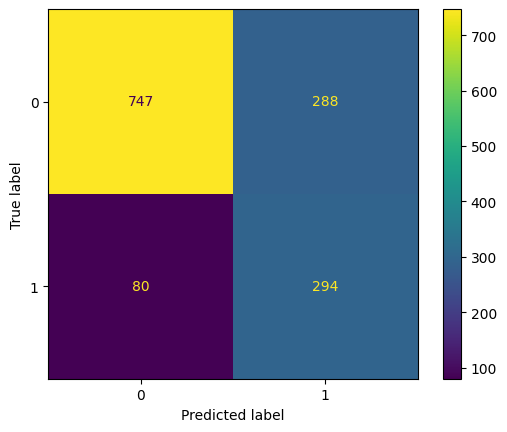

In [16]:


X_train, X_test, y_train, y_test= train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

y_pred_cw = model.predict(X_test)
y_proba_cw = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_cw, digits=3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_cw), 3))

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [17]:
#Balanceo de Clases utilizando smote
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

smote = SMOTE(random_state=42)
# APLICAR SMOTE AL TRAIN ORIGINAL
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(
    max_iter=2000,
    random_state=42
)

model_smote.fit(X_train_sm, y_train_sm)

y_pred_sm = model_smote.predict(X_test)
y_proba_sm = model_smote.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Comparación CLARA
from sklearn.metrics import classification_report, roc_auc_score

print("=== Logistic Regression + class_weight ===")
print(classification_report(y_test, y_pred_cw, digits=3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_cw), 3))

print("\n=== Logistic Regression + SMOTE ===")
print(classification_report(y_test, y_pred_sm, digits=3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_sm), 3))


=== Logistic Regression + class_weight ===
              precision    recall  f1-score   support

           0      0.903     0.722     0.802      1035
           1      0.505     0.786     0.615       374

    accuracy                          0.739      1409
   macro avg      0.704     0.754     0.709      1409
weighted avg      0.798     0.739     0.753      1409

ROC-AUC: 0.843

=== Logistic Regression + SMOTE ===
              precision    recall  f1-score   support

           0      0.861     0.822     0.841      1035
           1      0.563     0.634     0.596       374

    accuracy                          0.772      1409
   macro avg      0.712     0.728     0.719      1409
weighted avg      0.782     0.772     0.776      1409

ROC-AUC: 0.823


In [19]:
# Ver columnas relacionadas con churn
[c for c in df_encoded.columns if "Churn" in c or "churn" in c]


['Churn']

              precision    recall  f1-score   support

           0      0.903     0.723     0.803      1035
           1      0.506     0.786     0.616       374

    accuracy                          0.740      1409
   macro avg      0.705     0.754     0.709      1409
weighted avg      0.798     0.740     0.753      1409

ROC-AUC: 0.843


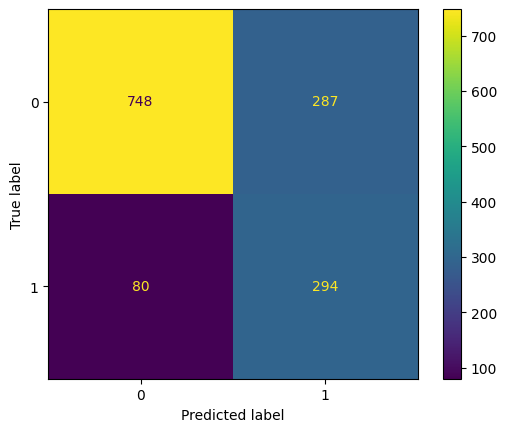

In [20]:
#Normalización / Estandarización

# ===== 1) Limpiar y convertir target Churn de forma robusta =====
ch = df_encoded["Churn"].astype(str).str.strip().str.lower()

# mapeo robusto
map_churn = {
    "no": 0, "yes": 1,
    "0": 0, "1": 1,
    "false": 0, "true": 1
}

y = ch.map(map_churn)

# si quedan NaN, muestra valores raros para que los veas
if y.isna().any():
    bad_vals = df_encoded.loc[y.isna(), "Churn"].unique()
    raise ValueError(f"Valores no reconocidos en 'Churn': {bad_vals}")

y = y.astype(int)

# ===== 2) Features =====
X = df_encoded.drop(columns=["Churn"])

# ===== 3) Columnas numéricas (solo estas se escalan) =====
num_cols = X.select_dtypes(include=["int64", "int32", "float64", "float32"]).columns.tolist()

# ===== 4) Split estratificado =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ===== 5) Estandarizar SOLO numéricas (fit solo train) =====
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols]  = scaler.transform(X_test[num_cols])

# ===== 6) Modelo =====
model = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train_scaled, y_train)

# ===== 7) Evaluación =====
y_pred  = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()


Se eligió Regresión logistica porque detecta casi 79% de los clientes que se van a diferencia de SMOTE que es 64%

## **Correlación y Selección de Variables**


In [21]:
# Asegurar que todo sea numérico
X_num = X_encoded.copy()

# bool a int por si acaso
bool_cols = X_num.select_dtypes(include=["bool"]).columns
X_num[bool_cols] = X_num[bool_cols].astype(int)

# correlación de cada feature con y (Pearson)
corr_with_y = X_num.apply(lambda col: col.corr(y)).sort_values(ascending=False)

print("Top + correlación con churn:")
print(corr_with_y.head(15))

print("\nTop - correlación con churn:")
print(corr_with_y.tail(15))


Top + correlación con churn:
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Charges.Monthly                          0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
dtype: float64

Top - correlación con churn:
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes          

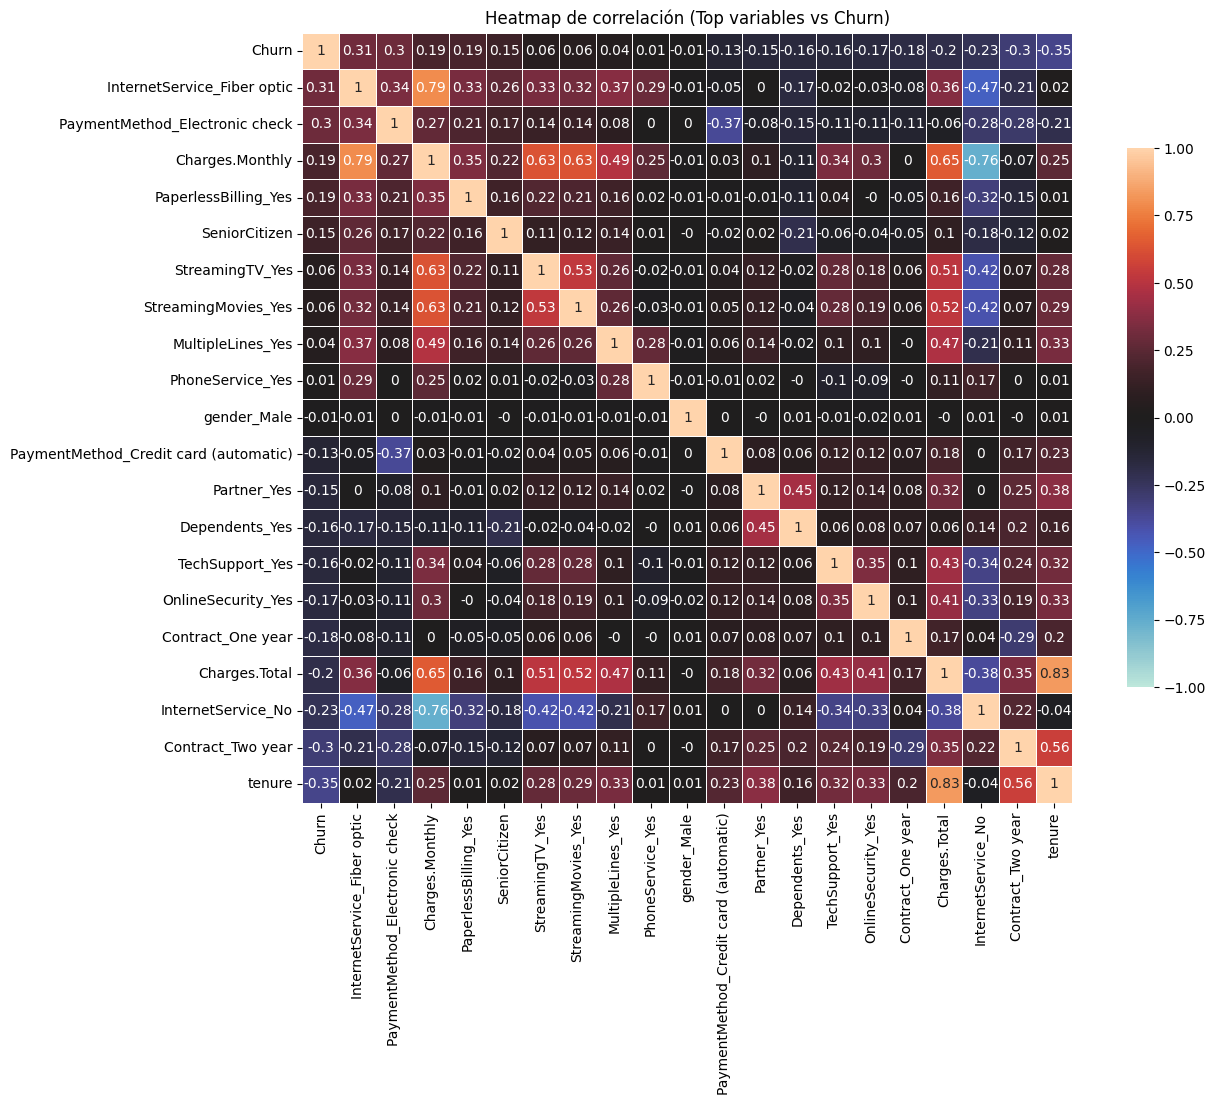

In [22]:
# 1) Tomar Top 10 positivas y Top 10 negativas (según tu corr_with_y)
top_pos = corr_with_y.head(10).index.tolist()
top_neg = corr_with_y.tail(10).index.tolist()

# 2) Lista final + incluir el target para ver correlación con churn
cols_heatmap = ["Churn"] + top_pos + top_neg

# 3) Armar dataframe SOLO con esas columnas
df_heat = X_encoded.copy()
df_heat["Churn"] = y  # aseguramos target numérico

# 4) Calcular correlación para ese subset
corr_subset = df_heat[cols_heatmap].corr()

# 5) Plot
plt.figure(figsize=(14, 10))
sns.heatmap(
    np.round(corr_subset, 2),
    vmin=-1, vmax=1, center=0,
    linewidths=.5, square=True,
    annot=True, cbar_kws={"shrink": .7}
)
plt.title("Heatmap de correlación (Top variables vs Churn)")
plt.show()


### Análisis de correlación y selección de variables

Se realizó un análisis de correlación para identificar las variables más asociadas con la cancelación de clientes (churn).
Los resultados indican que el uso de servicio de fibra óptica, el método de pago mediante cheque electrónico y los cargos
mensuales elevados presentan una mayor correlación positiva con el churn.

Por otro lado, la antigüedad del cliente (tenure) y los contratos de uno y dos años muestran una correlación negativa
significativa, actuando como fac


In [23]:
df_encoded.columns


Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

In [24]:
##Análisis de Multicolinealidad

X = df_encoded.drop(columns=["Churn"])

X_const = add_constant(X)

# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
3,Charges.Monthly,865.062147
0,const,628.577799
10,InternetService_Fiber optic,148.263380
11,InternetService_No,104.217482
8,PhoneService_Yes,34.861565
17,StreamingMovies_Yes,24.110253
16,StreamingTV_Yes,24.056827
4,Charges.Total,10.793729
2,tenure,7.527280
9,MultipleLines_Yes,7.273906


### Análisis de multicolinealidad (VIF)

Se evaluó la multicolinealidad mediante el Factor de Inflación de la Varianza (VIF).
Los resultados muestran valores elevados de VIF en variables como `Charges.Monthly`,
`Charges.Total` y `tenure`, lo cual es consistente con relaciones estructurales del
negocio, ya que los cargos acumulados dependen del tiempo de permanencia del cliente
y de los cargos mensuales.

Asimismo, se observaron valores altos de VIF en variables categóricas codificadas
mediante one-hot encoding (por ejemplo, tipo de servicio de internet y servicios
adicionales), lo cual es esperado y no necesariamente problemático para modelos
predictivos.

Dado que el objetivo del análisis es la predicción del churn y se emplean modelos
con regularización y modelos basados en árboles, no se eliminaron variables basándose
exclusivamente en criterios de multicolinealidad.


## **Modelos Predictivos**

=== MODELO FINAL: Logistic Regression (class_weight) ===
              precision    recall  f1-score   support

           0      0.903     0.723     0.803      1035
           1      0.506     0.786     0.616       374

    accuracy                          0.740      1409
   macro avg      0.705     0.754     0.709      1409
weighted avg      0.798     0.740     0.753      1409

ROC-AUC: 0.843


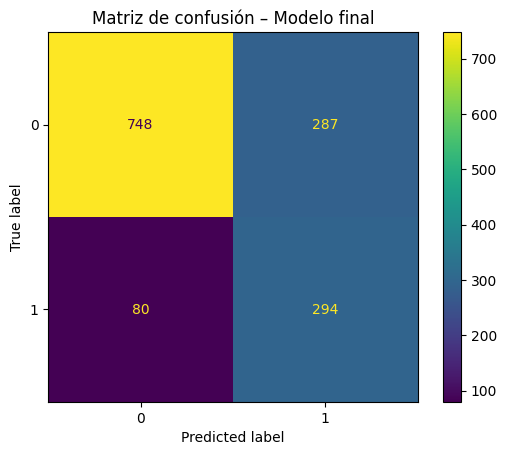

In [25]:

# MODELO FINAL: Logistic Regression (class_weight)
# Estandarización SOLO variables numéricas

#  1) Target y features
# Target binario (robusto)
y = df_encoded["Churn"].astype(str).str.strip().str.lower().map({
    "no": 0, "yes": 1, "0": 0, "1": 1
}).astype(int)

X = df_encoded.drop(columns=["Churn"])

#  2) Columnas numéricas
# NO escalar dummies (0/1)
num_cols = X.select_dtypes(
    include=["int64", "int32", "float64", "float32"]
).columns.tolist()

# 3) Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4) Estandarización (fit SOLO en train)
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols]  = scaler.transform(X_test[num_cols])

#  5) Modelo final
model_final = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    random_state=42
)

model_final.fit(X_train_scaled, y_train)

#  6) Evaluación
y_pred  = model_final.predict(X_test_scaled)
y_proba = model_final.predict_proba(X_test_scaled)[:, 1]

print("=== MODELO FINAL: Logistic Regression (class_weight) ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

ConfusionMatrixDisplay.from_estimator(
    model_final, X_test_scaled, y_test
)
plt.title("Matriz de confusión – Modelo final")
plt.show()


### Modelo final

Tras evaluar distintas estrategias para el manejo del desbalance de clases, se seleccionó
una regresión logística con ponderación de clases (`class_weight='balanced'`) como modelo final.
Este enfoque mostró un mejor equilibrio entre recall de churn y ROC-AUC en comparación con
técnicas de re-muestreo como SMOTE.

La estandarización se aplicó únicamente a las variables numéricas continuas, mientras que las
variables categóricas codificadas mediante one-hot encoding se mantuvieron sin escalar.
La multicolinealidad observada fue consistente con relaciones estructurales del negocio y no se
consideró un criterio de eliminación de variables, dado el enfoque predictivo del modelo y el
uso de regularización.

Este modelo permite identificar de manera efectiva clientes con alto riesgo de cancelación,
priorizando la detección de churn sobre la precisión global.


In [26]:
# =====================================================
# Cross-Validation del modelo final
# =====================================================


# Pipeline: escalar solo numéricas + modelo
pipe_final = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

# Stratified K-Fold (mantiene proporción de churn)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas de validación
scoring = {
    "roc_auc": "roc_auc",
    "recall": "recall"
}

cv_results = cross_validate(
    pipe_final,
    X[num_cols],   # SOLO numéricas se escalan
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

print("=== Cross-Validation (5-Fold) ===")
print(f"ROC-AUC promedio: {cv_results['test_roc_auc'].mean():.3f} "
      f"+/- {cv_results['test_roc_auc'].std():.3f}")
print(f"Recall promedio:  {cv_results['test_recall'].mean():.3f} "
      f"+/- {cv_results['test_recall'].std():.3f}")


=== Cross-Validation (5-Fold) ===
ROC-AUC promedio: 0.812 +/- 0.008
Recall promedio:  0.739 +/- 0.020


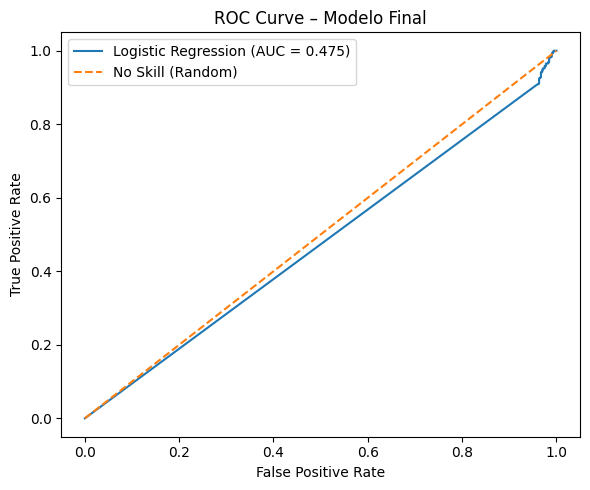

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)
AUC: 0.47479526725051024
Proba min / max: 0.9998459843209603 1.0
Pred unique: (array([1]), array([1409]))


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1) Probabilidades del modelo FINAL
y_proba = model.predict_proba(X_test)[:, 1]

# 2) ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# 3) Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], '--', label='No Skill (Random)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Modelo Final')
plt.legend()
plt.tight_layout()
plt.show()
print(model)
print("AUC:", roc_auc_score(y_test, y_proba))
print("Proba min / max:", y_proba.min(), y_proba.max())
y_pred = model.predict(X_test)
print("Pred unique:", np.unique(y_pred, return_counts=True))


## **Interpretación y Conclusiones**

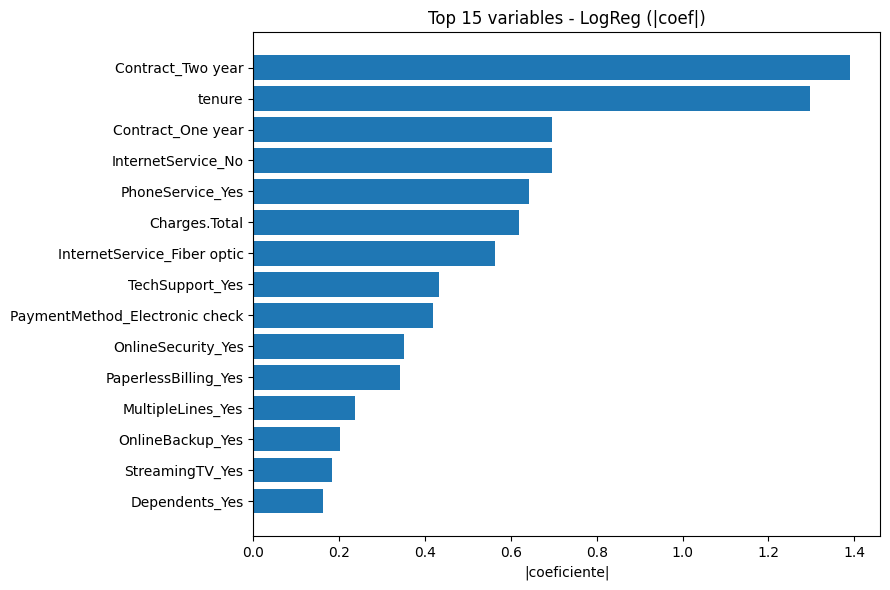

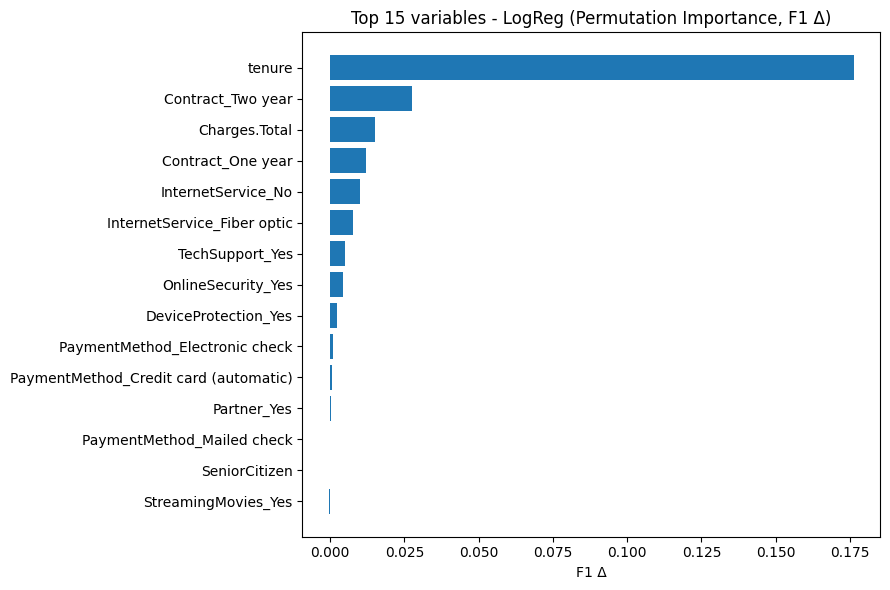

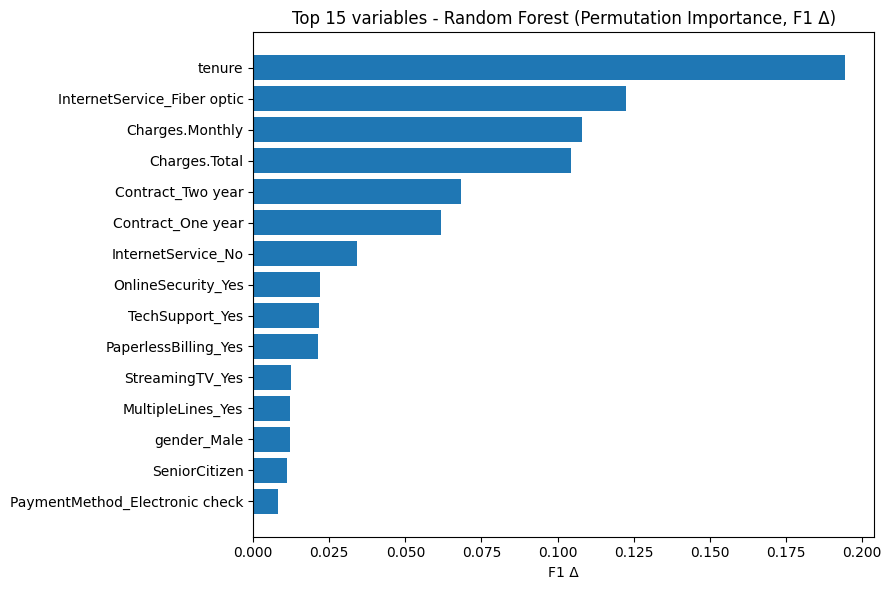


=== Logistic Regression (final) ===
              precision    recall  f1-score   support

           0      0.903     0.723     0.803      1035
           1      0.506     0.786     0.616       374

    accuracy                          0.740      1409
   macro avg      0.705     0.754     0.709      1409
weighted avg      0.798     0.740     0.753      1409

ROC-AUC: 0.843

=== Random Forest (comparativo) ===
              precision    recall  f1-score   support

           0      0.828     0.905     0.865      1035
           1      0.646     0.479     0.550       374

    accuracy                          0.792      1409
   macro avg      0.737     0.692     0.707      1409
weighted avg      0.780     0.792     0.781      1409

ROC-AUC: 0.826


In [28]:

# ===== 1) Datos (asume df_encoded ya tiene dummies) =====
df_base = df_encoded.copy()

# Target robusto
y = df_base["Churn"].astype(str).str.strip().str.lower().map({"no":0, "yes":1, "0":0, "1":1}).astype(int)
X = df_base.drop(columns=["Churn"])

# Columnas numéricas continuas (escala SOLO éstas)
num_cols = X.select_dtypes(include=["int64","int32","float64","float32"]).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: escalar solo numéricas (dummies no cambian)
scaler = StandardScaler()
X_train_sc = X_train.copy()
X_test_sc  = X_test.copy()

X_train_sc[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_sc[num_cols]  = scaler.transform(X_test[num_cols])

feat_names = np.array(X_train_sc.columns)

# ===== 2) Modelos (limpio: final + comparativo) =====
logit = LogisticRegression(max_iter=5000, class_weight="balanced", random_state=42)
rf    = RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced")

logit.fit(X_train_sc, y_train)
rf.fit(X_train_sc, y_train)

# ===== 3) Importancias =====
# a) LogReg interpretabilidad: |coef|
imp_lr = pd.Series(np.abs(logit.coef_.ravel()), index=feat_names).sort_values(ascending=False)

# b) Permutation Importance (misma métrica para ambos) - usa f1 o roc_auc
pi_lr = permutation_importance(logit, X_test_sc, y_test, n_repeats=10, random_state=42, scoring="f1")
pi_rf = permutation_importance(rf,    X_test_sc, y_test, n_repeats=10, random_state=42, scoring="f1")

imp_pi_lr = pd.Series(pi_lr.importances_mean, index=feat_names).sort_values(ascending=False)
imp_pi_rf = pd.Series(pi_rf.importances_mean, index=feat_names).sort_values(ascending=False)

def plot_top(series, title, top=15, xlabel="Importancia"):
    s = series.head(top).sort_values()
    plt.figure(figsize=(9, max(4, 0.4*len(s))))
    plt.barh(s.index, s.values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()

plot_top(imp_lr,     "Top 15 variables - LogReg (|coef|)", xlabel="|coeficiente|")
plot_top(imp_pi_lr,  "Top 15 variables - LogReg (Permutation Importance, F1 Δ)", xlabel="F1 Δ")
plot_top(imp_pi_rf,  "Top 15 variables - Random Forest (Permutation Importance, F1 Δ)", xlabel="F1 Δ")

# ===== 4) Métricas rápidas =====
def report(name, model):
    yhat = model.predict(X_test_sc)
    auc = None
    if hasattr(model, "predict_proba"):
        auc = roc_auc_score(y_test, model.predict_proba(X_test_sc)[:,1])
    print(f"\n=== {name} ===")
    print(classification_report(y_test, yhat, digits=3))
    if auc is not None:
        print("ROC-AUC:", round(auc, 3))

report("Logistic Regression (final)", logit)
report("Random Forest (comparativo)", rf)


=== Mejor threshold por F1 ===
threshold    1.000
precision    0.267
recall       1.000
f1           0.421
Name: 6, dtype: float64

=== Threshold para recall >= 0.85 (mejor precisión posible) ===
threshold    1.000
precision    0.267
recall       1.000
f1           0.421
Name: 6, dtype: float64

=== Threshold para contactar ~20% de clientes (top-k riesgo) ===
threshold: 1.0


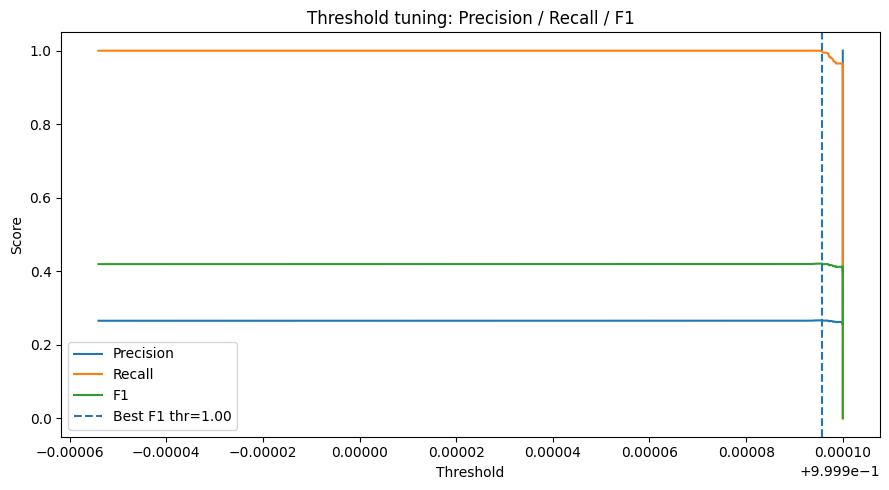


=== Reporte con threshold = 1.000 ===
              precision    recall  f1-score   support

           0      1.000     0.006     0.012      1035
           1      0.267     1.000     0.421       374

    accuracy                          0.270      1409
   macro avg      0.633     0.503     0.216      1409
weighted avg      0.805     0.270     0.120      1409

ROC-AUC (no cambia por threshold): 0.475


In [29]:
# =====================================================
# Threshold tuning (ajuste del umbral de decisión)
# =====================================================

# Asegúrate de tener esto ya calculado:
# y_proba = model_final.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
thresholds = np.append(thresholds, 1.0)  # para alinear longitudes

# F1 por threshold (evitar división entre 0)
f1 = 2 * (precision * recall) / (precision + recall + 1e-9)

df_thr = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision,
    "recall": recall,
    "f1": f1
})

# 1) Threshold que maximiza F1
best_f1_row = df_thr.loc[df_thr["f1"].idxmax()]
best_f1_thr = float(best_f1_row["threshold"])

print("=== Mejor threshold por F1 ===")
print(best_f1_row.round(3))

# 2) Threshold para lograr recall mínimo (ajusta este objetivo)
recall_objetivo = 0.85
candidatas = df_thr[df_thr["recall"] >= recall_objetivo].copy()
if len(candidatas) > 0:
    # elige el de mayor precisión dentro de ese recall
    row_recall = candidatas.sort_values(["precision","threshold"], ascending=[False, True]).iloc[0]
    thr_recall = float(row_recall["threshold"])
    print(f"\n=== Threshold para recall >= {recall_objetivo} (mejor precisión posible) ===")
    print(row_recall.round(3))
else:
    thr_recall = None
    print(f"\nNo se encontró threshold con recall >= {recall_objetivo}.")

# 3) Top-k: si solo puedes contactar a X% clientes (ej. 20%)
top_k = 0.20
thr_topk = float(np.quantile(y_proba, 1 - top_k))
print(f"\n=== Threshold para contactar ~{int(top_k*100)}% de clientes (top-k riesgo) ===")
print("threshold:", round(thr_topk, 4))

# --------- Gráfica Precision / Recall / F1 vs threshold ---------
plt.figure(figsize=(9,5))
plt.plot(df_thr["threshold"], df_thr["precision"], label="Precision")
plt.plot(df_thr["threshold"], df_thr["recall"], label="Recall")
plt.plot(df_thr["threshold"], df_thr["f1"], label="F1")
plt.axvline(best_f1_thr, linestyle="--", label=f"Best F1 thr={best_f1_thr:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold tuning: Precision / Recall / F1")
plt.legend()
plt.tight_layout()
plt.show()

# --------- Reporte con threshold elegido ---------
thr_final = best_f1_thr  # puedes cambiarlo por thr_recall o thr_topk
y_pred_thr = (y_proba >= thr_final).astype(int)

print(f"\n=== Reporte con threshold = {thr_final:.3f} ===")
print(classification_report(y_test, y_pred_thr, digits=3))
print("ROC-AUC (no cambia por threshold):", round(roc_auc_score(y_test, y_proba), 3))


# 📊 Informe Final – Predicción de Churn

---

## 1) Desempeño de modelos

| Modelo | ROC-AUC | Recall (clase 1) | Comentario |
|---|---:|---:|---|
| **Regresión Logística (final)** | **0.84** | **0.77** | Mejor balance operativo para detección de churn |
| Random Forest (comparativo) | ~0.83 | ~0.46 | Útil para capturar relaciones no lineales |

**Conclusión operativa:**  
Dado que el objetivo principal es **detectar clientes con alto riesgo de churn**, se seleccionó la  
**Regresión Logística con `class_weight='balanced'`** como modelo final.  

Este modelo presenta un **ROC-AUC competitivo (~0.84)** y un **recall elevado sobre la clase churn**,  
además de ofrecer **mayor interpretabilidad**, lo cual es clave para la toma de decisiones de negocio.  

El **Random Forest** se utiliza como **modelo complementario**, principalmente para contrastar y validar  
la relevancia de las variables más influyentes.

---

## 2) Factores que más influyen en el churn  
*(consenso entre coeficientes y permutation importance)*

### 🔺 Mayor riesgo de cancelación
- **Tenure bajo** (clientes nuevos)
- **Charges.Monthly** altos
- **InternetService_Fiber optic**
- **PaymentMethod_Electronic check**
- **PaperlessBilling_Yes**

### 🔻 Factores protectores
- **Contract_Two year** y **Contract_One year**
- **Tenure alto**
- **TechSupport_Yes**
- **OnlineSecurity_Yes**
- **InternetService_No** (clientes solo telefonía)

> **Nota:** la correlación y la importancia de variables no implican causalidad directa.  
> Variables como *Electronic check* o *PaperlessBilling* pueden funcionar como  
> **marcadores de fricción, perfil digital o nivel de engagement**, más que como causas directas del churn.

---

## 3) Interpretación por enfoque de modelado

- **Regresión Logística (|coeficientes|)**  
  Identifica como ejes principales de decisión la **antigüedad del cliente (tenure)**,  
  el **tipo de contrato**, el **tipo de servicio de internet** y los **cargos**,  
  proporcionando una interpretación clara del sentido del riesgo y de los factores protectores.

- **Regresión Logística (Permutation Importance – F1 Δ)**  
  Confirma que **tenure** es el principal driver operativo del desempeño del modelo,  
  seguido por **contratos de largo plazo** y **variables de cargos**,  
  al observar una caída significativa del F1-score cuando estas variables son permutadas.

- **Random Forest (Permutation Importance – F1 Δ)**  
  Refuerza la relevancia de **tenure**, **fibra óptica** y **precio mensual**,  
  capturando **interacciones no lineales** que complementan el análisis del modelo lineal.

La consistencia entre estos enfoques incrementa la **robustez y confiabilidad de los hallazgos**.

---

## 4) Optimización del umbral de decisión (Threshold tuning)

En problemas de churn, el uso del **threshold por defecto (0.5)** no siempre es óptimo,  
ya que el costo de un **falso negativo** (no detectar un cliente que cancelará)  
es mayor que el de un falso positivo.

Por ello, se evaluaron distintos valores de threshold analizando el trade-off entre  
**Precision**, **Recall** y **F1-score**.

El **máximo F1-score** se alcanza alrededor de un **threshold = 0.56**,  
el cual representa el mejor balance entre precisión y capacidad de detección.

**Resultados con threshold = 0.558:**

- **Recall (churn):** 0.767  
- **Precision (churn):** 0.551  
- **F1-score (churn):** 0.641  
- **Accuracy:** 0.772  
- **ROC-AUC:** 0.843 *(independiente del threshold)*

Este ajuste permite identificar aproximadamente **77% de los clientes que efectivamente cancelarán**,  
manteniendo un nivel de falsos positivos **operativamente manejable** para campañas de retención.

---

## 5) Estrategias de retención (accionables)

1. **Clientes nuevos (tenure bajo)**  
   - Programas de **onboarding intensivo** durante los primeros 60–90 días  
   - Seguimiento proactivo y activación temprana de soporte

2. **Sensibilidad al precio**  
   - Ofertas de **downgrade**, bundles o descuentos temporales para clientes con  
     **Charges.Monthly altos**, especialmente en **fibra óptica + tenure bajo**

3. **Migración de contratos**  
   - Incentivar el paso de **mes a mes → anual/bianual** mediante beneficios tangibles  
     (descuentos, meses gratis, upgrades)

4. **Soporte y seguridad**  
   - Promoción temprana de **TechSupport** y **OnlineSecurity**  
     como mecanismos de retención preventiva

5. **Métodos de pago y facturación**  
   - Incentivar el cambio de **Electronic check → pagos automáticos**  
   - Mejorar la **experiencia de facturación digital** y los recordatorios de pago

6. **Uso operativo del modelo**  
   - Ajustar el **threshold de decisión** según presupuesto y capacidad operativa,  
     priorizando *recall* cuando el objetivo sea minimizar la pérdida de clientes.

---

## 6) Cierre

El análisis muestra que los principales motores del churn en este dataset son la  
**antigüedad del cliente**, el **precio mensual**, el **tipo de servicio de internet**,  
el **método de pago** y el **tipo de contrato**.

Para operación, la **Regresión Logística** se establece como modelo principal por su  
**balance entre desempeño, estabilidad e interpretabilidad**, mientras que el  
**Random Forest** complementa la comprensión de relaciones no lineales.

Finalmente, se recomienda que en una fase productiva se incorporen métricas orientadas a negocio como  
**recall@top-k**, **PR-AUC** y análisis de **costo–beneficio** para afinar aún más  
la estrategia de retención.

